<h2 align='center' style='color:purple'>## Exercise (Normal Distribution and Z Score for Outlier Removal)</h2>

In [1]:
import pandas as pd
import seaborn as sn

we are given bhp.csv which contains property prices in the city of banglore, India. we need to examine price_per_sqft column and do following,




In [32]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


**(1) Outlier detection and removal using Standard Deviation**

In [53]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft,zscore
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03,7.401487e-17
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05,1.000000e+00
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02,-1.256181e+00
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03,-3.679739e-01
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03,-2.265396e-01
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03,9.431424e-02
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07,4.098904e+01


<Axes: xlabel='price_per_sqft', ylabel='Count'>

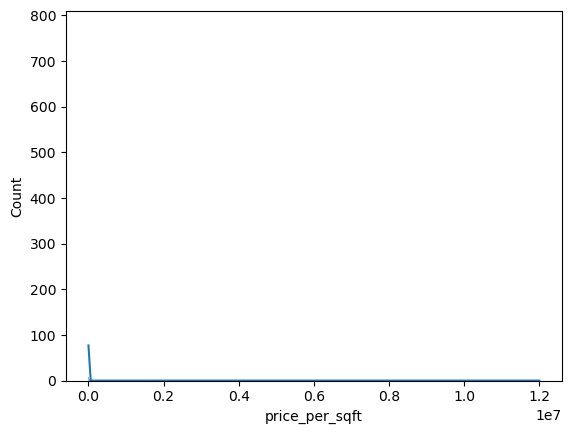

In [54]:
sn.histplot(df.price_per_sqft, kde=True)

In [56]:
mean = df.price_per_sqft.mean()
mean

7920.336742424242

In [57]:
std_deviation = df.price_per_sqft.std()
std_deviation

106727.16032810845

In [58]:
lower = mean-3*std_deviation

In [59]:
upper = mean+3*std_deviation

In [60]:
df[(df.price_per_sqft < lower) | (df.price_per_sqft > upper)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,-1.248100
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,-1.237593
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,-1.256181
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,-1.252949
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333,-1.208498


In [62]:
df_no_outlier = df[(df.price_per_sqft<upper) & (df.price_per_sqft>lower)]
df_no_outlier.shape

(13195, 8)

**(2) Outlier detection and removal using Z Score**

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score

<img height=200 width=300 src="zscore.png" />

Let's add a new column in our dataframe for this Z score

In [65]:
df['zscore'] = ( df.price_per_sqft - df.price_per_sqft.mean() ) / df.price_per_sqft.std()
df.head(4)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [66]:
df.price_per_sqft.mean()

7920.336742424242

In [68]:
df.price_per_sqft.std()

106727.16032810845

In [74]:
(3699-7.920)/1.067

3459.3064667291474

In [75]:
df[df['zscore']>3]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,6.229030
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,5.781843
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,112.362023
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,21.476067
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333,3.330105


In [50]:
df[df['zscore']<-3]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore


In [76]:
new_df_zscore = df[(df['zscore']< 3) & (df['zscore'] > -3)]

new_df_zscore.shape

(13195, 8)

In [77]:
df.shape

(13200, 8)